# Импорт библиотек и определение класса модели
Импорт необходимых библиотек (numpy, pandas, matplotlib) и определение класса Model с методами predict, error, fit и визуализации.

In [1]:
# Импорт библиотек и определение класса модели

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # type: ignore

class Model:
    """Модель парной линейной регрессии с адаптивным обучением"""
    
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
        
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
        return np.mean((self.predict(X) - Y)**2) / 2
    
    def fit(self, X, Y, alpha=1.0, min_error_change=1e-6, max_steps=5000):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
            
        steps, errors = [], []
        step = 0
        prev_error = float('inf')
        
        while step < max_steps:
            dJ0 = np.mean(self.predict(X) - Y)
            dJ1 = np.mean((self.predict(X) - Y) * X)
            
            old_b0, old_b1 = self.b0, self.b1
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            current_error = self.error(X, Y)
            
            if current_error > prev_error:
                self.b0, self.b1 = old_b0, old_b1
                alpha /= 2
                continue
                
            error_change = abs(prev_error - current_error)
            if error_change < min_error_change:
                break
                
            prev_error = current_error
            step += 1
            steps.append(step)
            errors.append(current_error)
            
        return steps, errors

    def plot_regression(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]
            
        plt.figure(figsize=(10, 6))
        plt.scatter(X, Y, alpha=0.5, label='Точки данных')
        
        x_min, x_max = X.min(), X.max()
        x_line = np.linspace(x_min, x_max, 100)
        y_line = self.predict(x_line)
        
        plt.plot(x_line, y_line, 'r', label='Линия регрессии')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Линейная регрессия')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_learning_curve(self, steps, errors):
        plt.figure(figsize=(10, 6))
        plt.plot(steps, errors, 'g-')
        plt.xlabel('Итерации')
        plt.ylabel('Среднеквадратичная ошибка')
        plt.title('Кривая обучения')
        plt.grid(True)
        plt.show()

# Создание и тренировка модели с разными начальными параметрами
Загрузка данных и тестирование модели с различными начальными значениями параметров b0 и b1. Построение графиков регрессии и кривых обучения.

=== Тест разных начальных значений ===

Начальные параметры b0=0, b1=0
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


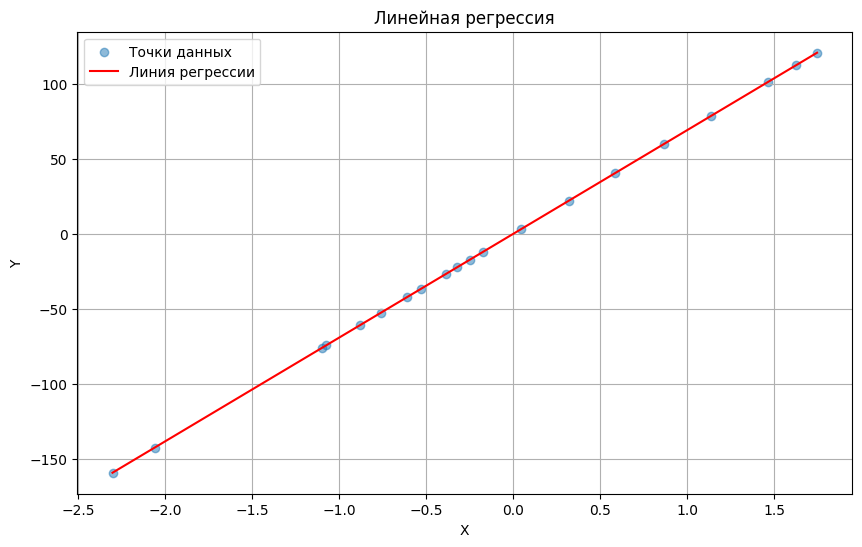

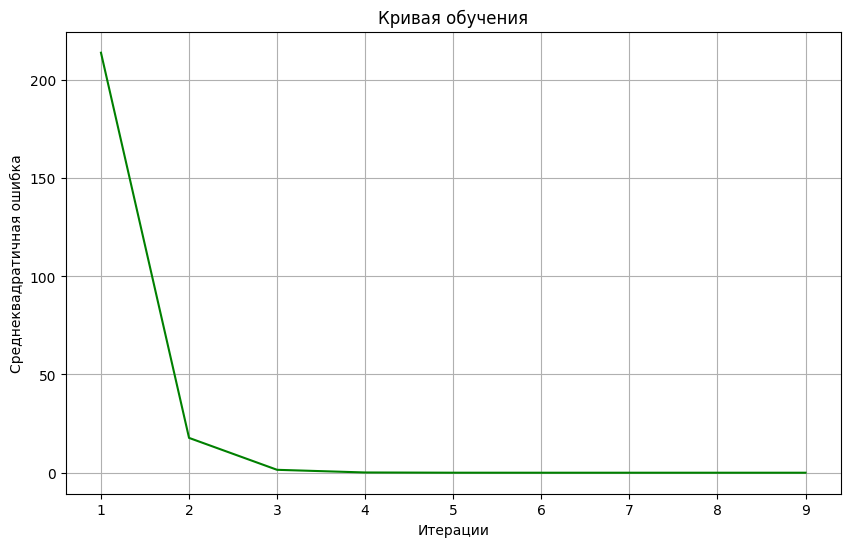


Начальные параметры b0=1, b1=1
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


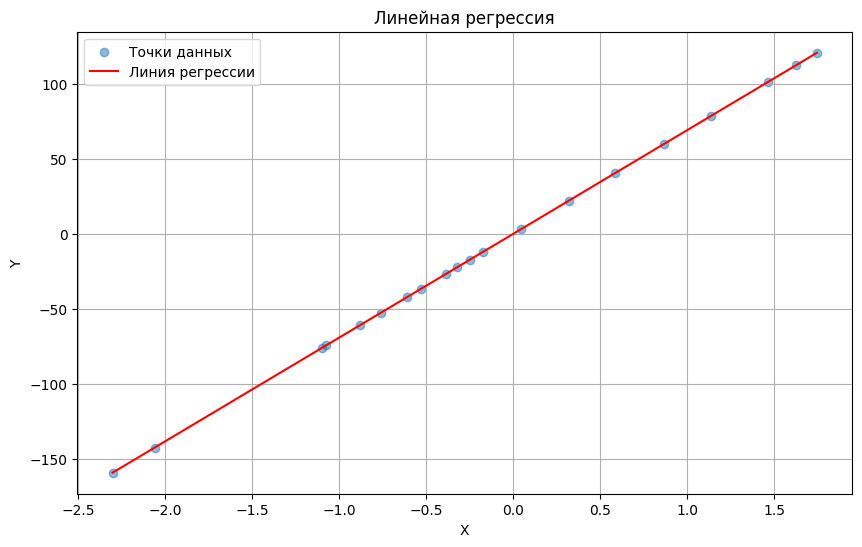

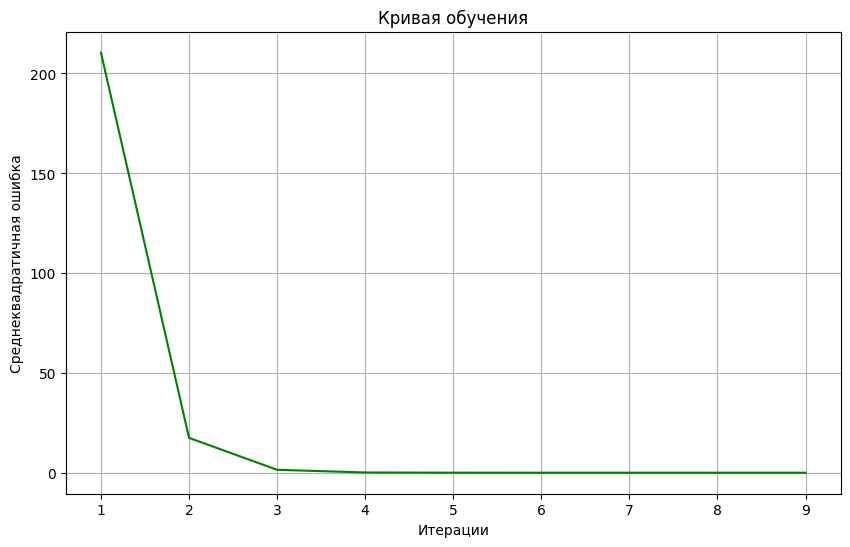


Начальные параметры b0=-1, b1=-1
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


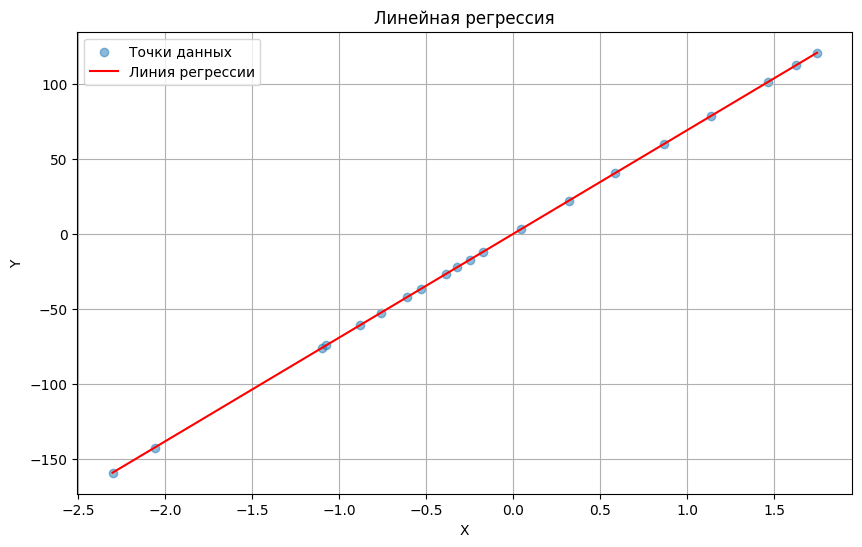

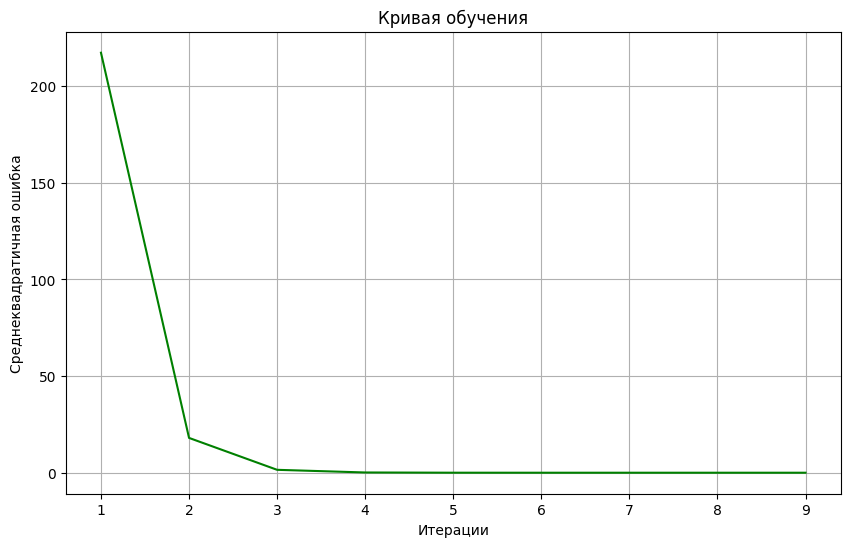


Начальные параметры b0=10, b1=10
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


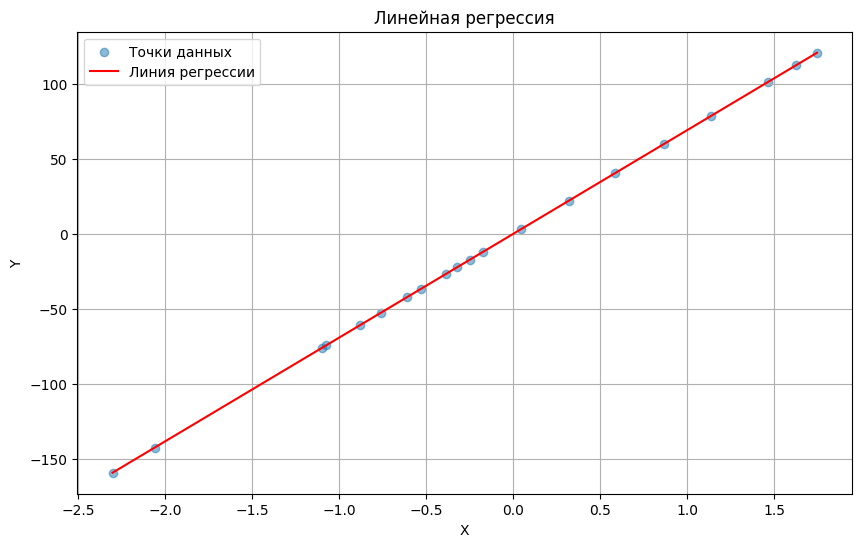

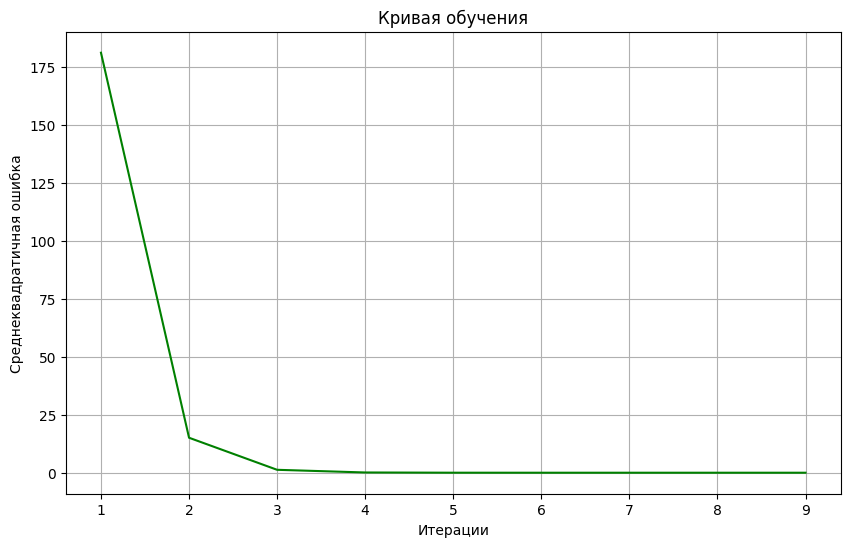


Начальные параметры b0=-10, b1=-10
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


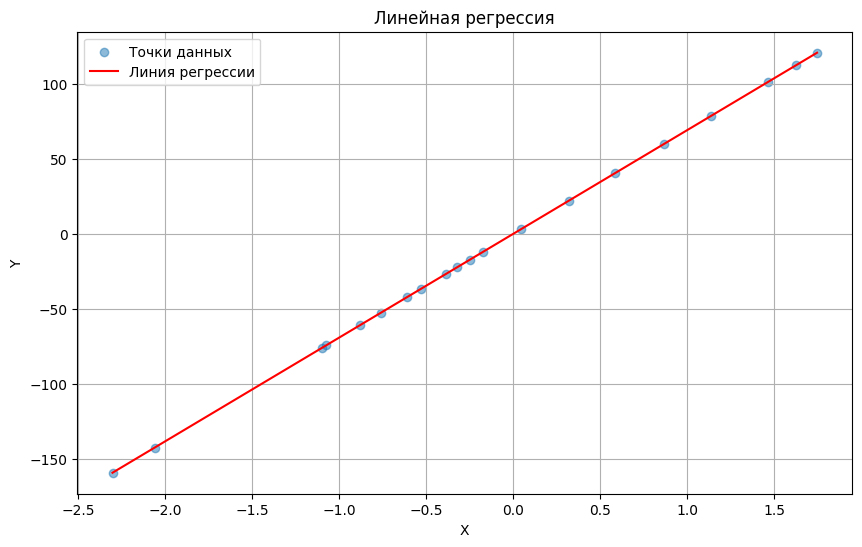

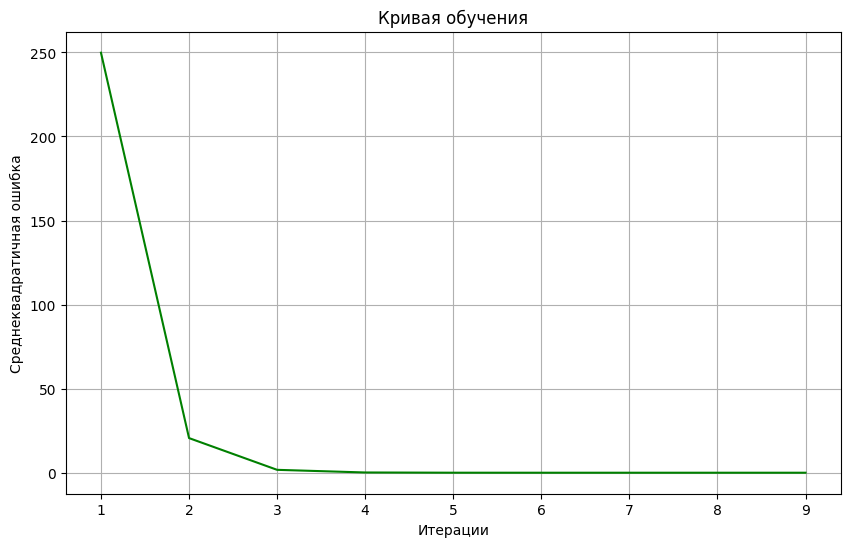

In [2]:
# Создание и тренировка модели с разными начальными параметрами

# Загрузка данных
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

# Тест 1: Разные начальные значения параметров
print("=== Тест разных начальных значений ===")
initial_params = [
    (0, 0),
    (1, 1),
    (-1, -1),
    (10, 10),
    (-10, -10)
]

for b0, b1 in initial_params:
    model = Model(b0=b0, b1=b1)
    steps, errors = model.fit(x, y)
    print(f"\nНачальные параметры b0={b0}, b1={b1}")
    print(f"Итоговая ошибка: {model.error(x, y):.6f}")
    print(f"Итоговые параметры b0={model.b0:.4f}, b1={model.b1:.4f}")
    model.plot_regression(x, y)
    model.plot_learning_curve(steps, errors)

# Анализ влияния скорости обучения
Тестирование модели с разными значениями скорости обучения alpha. Анализ влияния на скорость сходимости и качество модели.


=== Тест разных скоростей обучения ===

Скорость обучения alpha=0.1
Итоговая ошибка: 0.000004
Количество шагов: 92


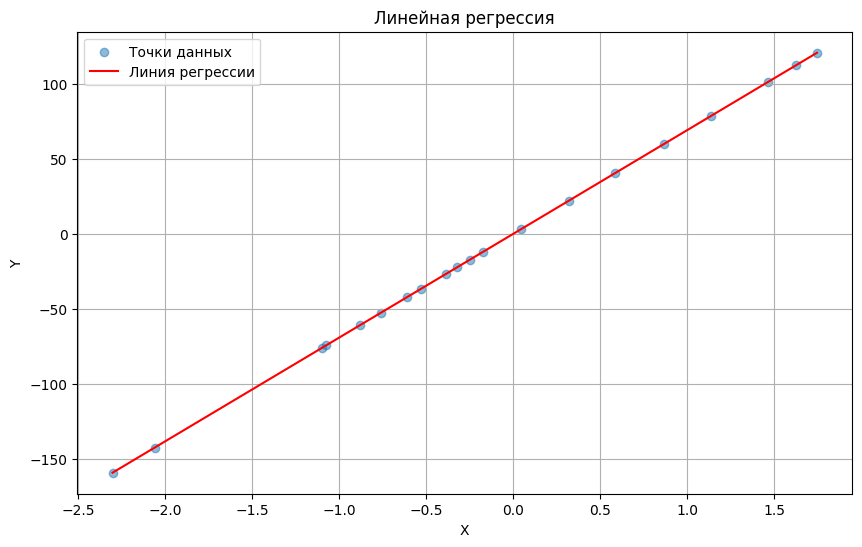

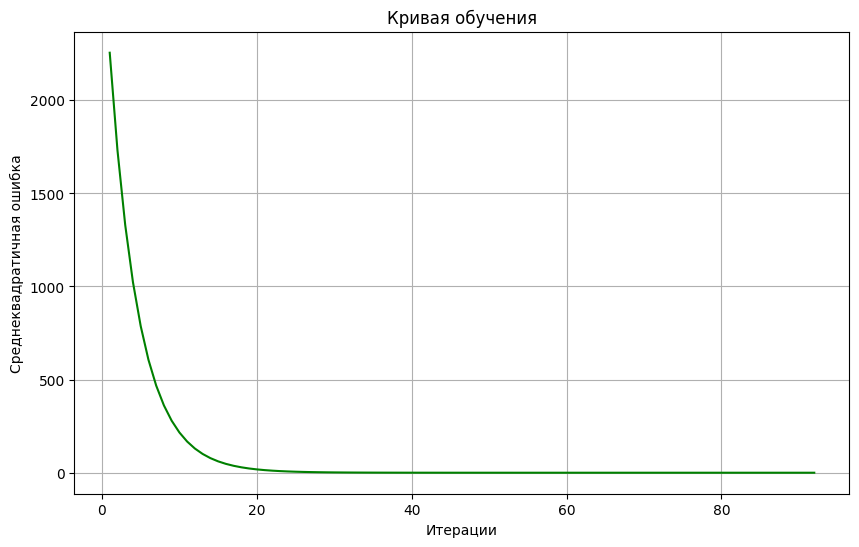


Скорость обучения alpha=0.5
Итоговая ошибка: 0.000000
Количество шагов: 16


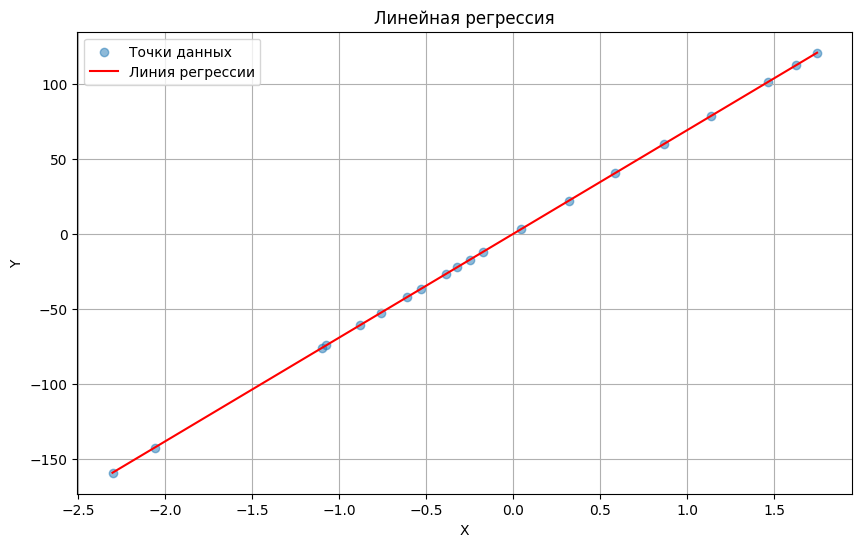

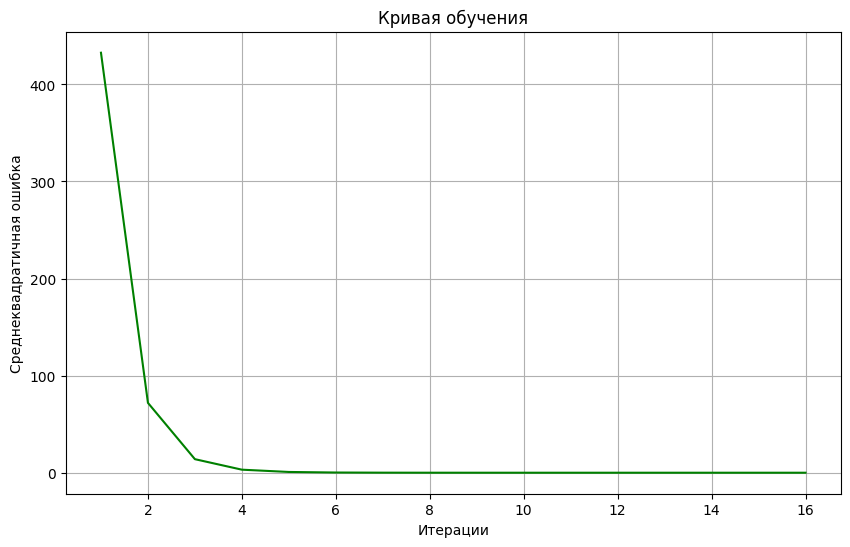


Скорость обучения alpha=1.0
Итоговая ошибка: 0.000000
Количество шагов: 9


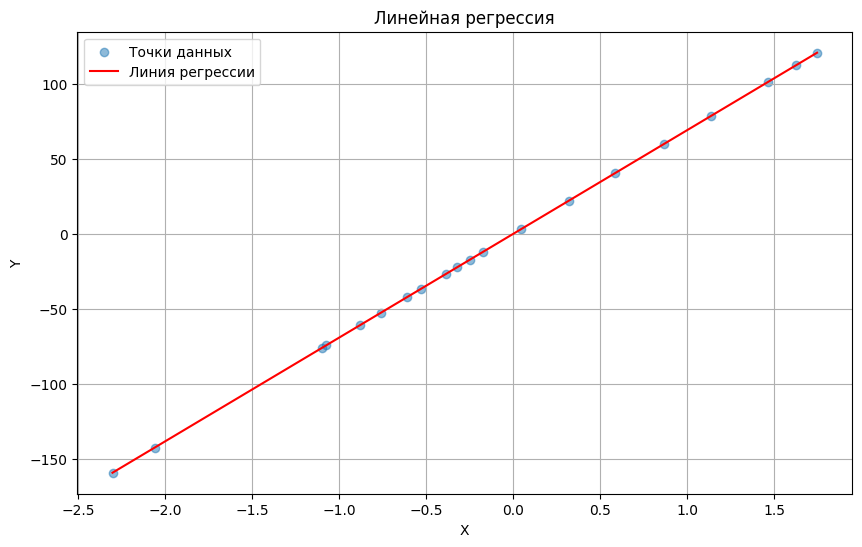

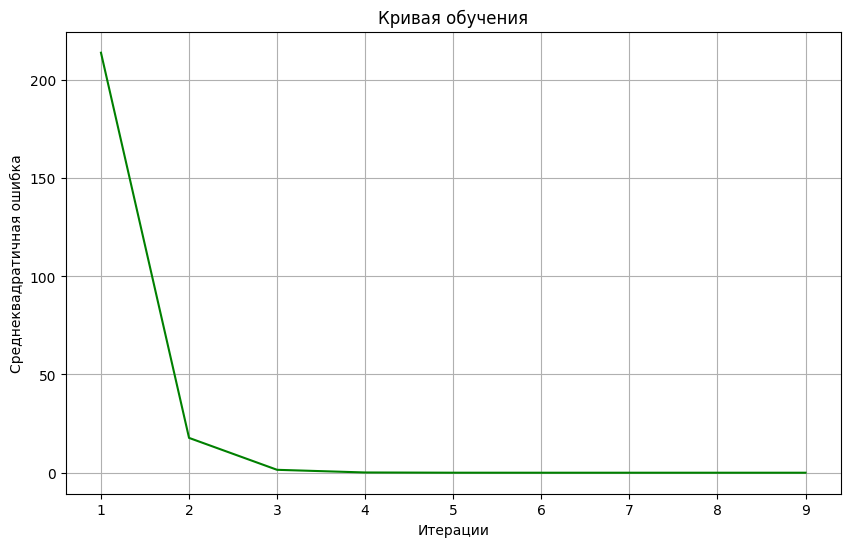


Скорость обучения alpha=2.0
Итоговая ошибка: 0.000000
Количество шагов: 11


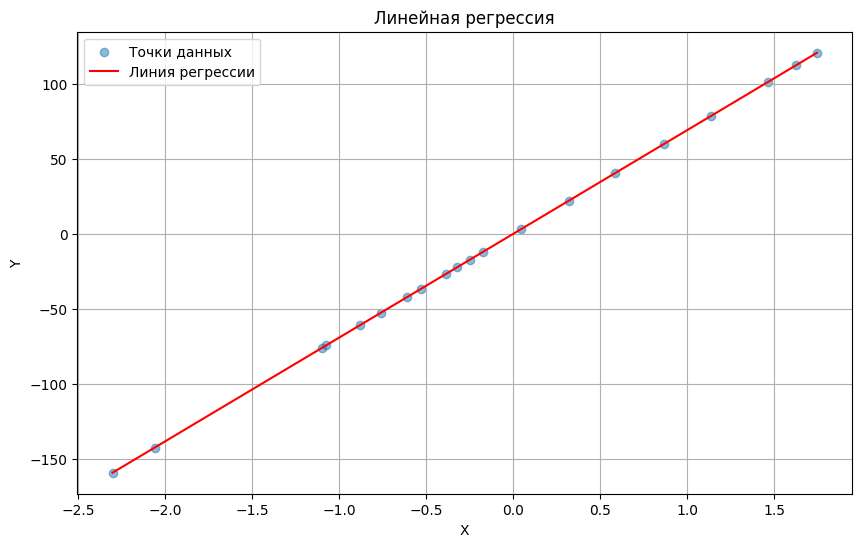

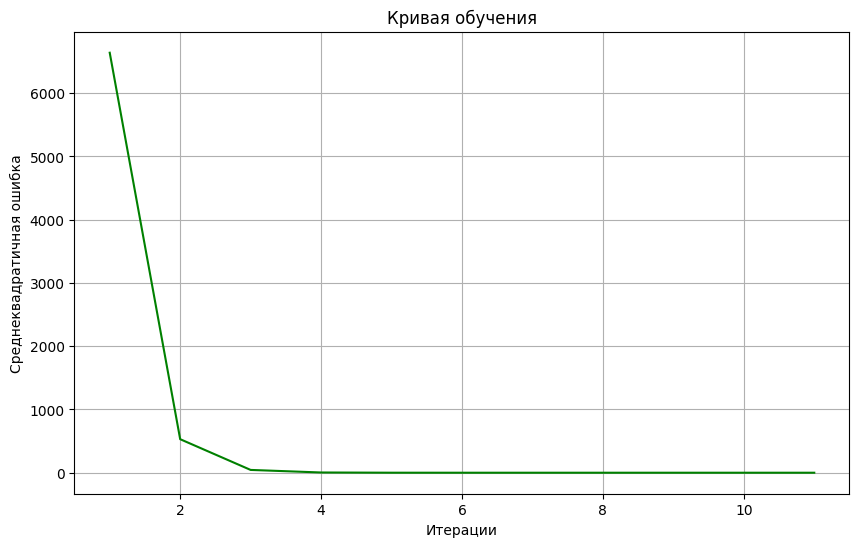


Скорость обучения alpha=5.0
Итоговая ошибка: 0.000001
Количество шагов: 26


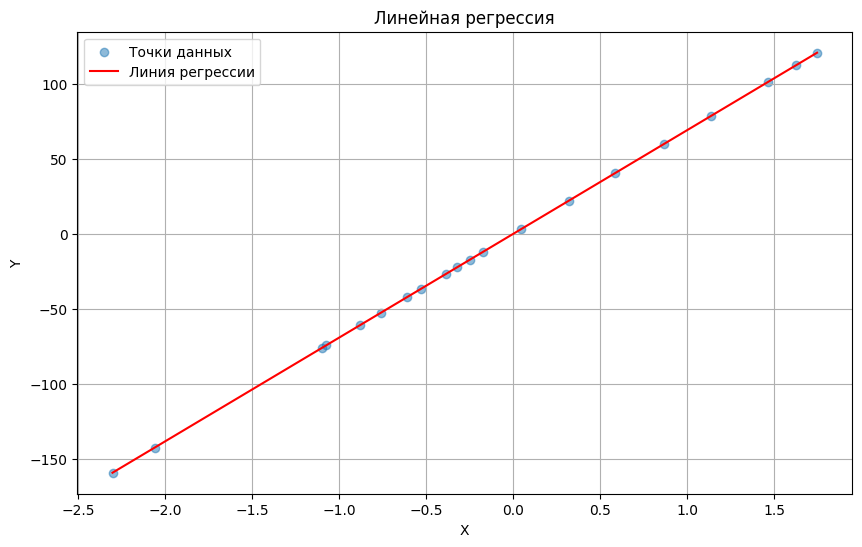

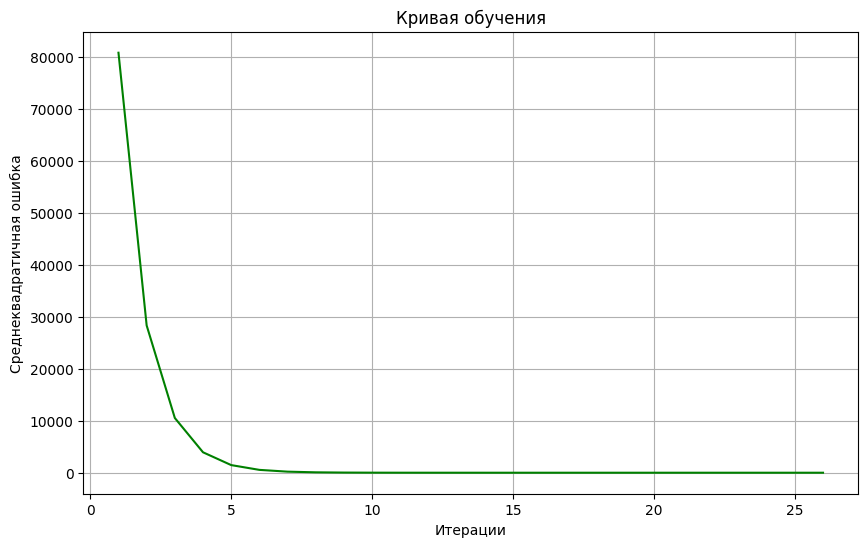


Скорость обучения alpha=10.0
Итоговая ошибка: 0.000000
Количество шагов: 28


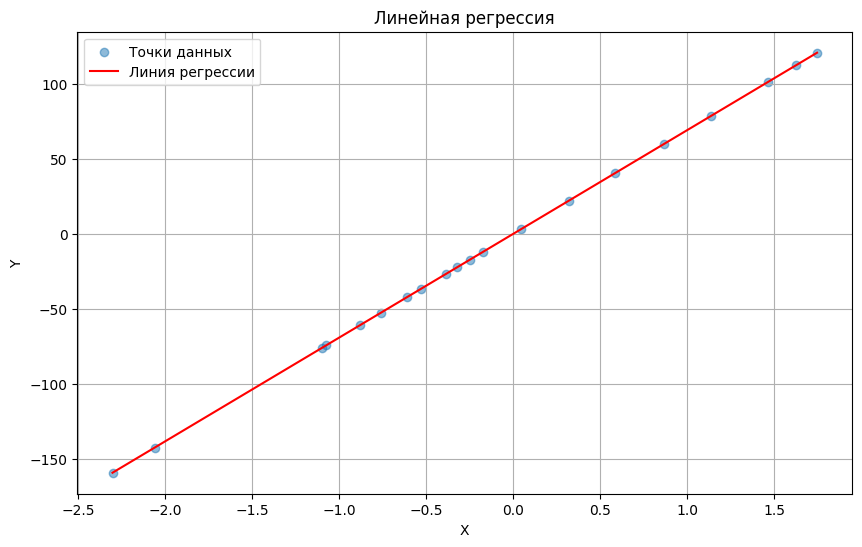

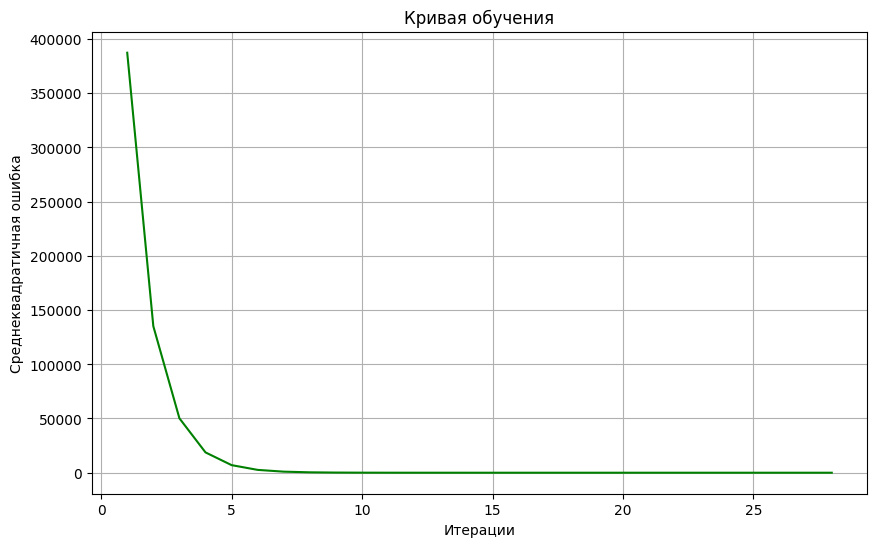

In [3]:
# Анализ влияния скорости обучения

# Тест 2: Разные скорости обучения
print("\n=== Тест разных скоростей обучения ===")
learning_rates = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

for alpha in learning_rates:
    model = Model()
    steps, errors = model.fit(x, y, alpha=alpha)
    print(f"\nСкорость обучения alpha={alpha}")
    print(f"Итоговая ошибка: {model.error(x, y):.6f}")
    print(f"Количество шагов: {len(steps)}")
    model.plot_regression(x, y)
    model.plot_learning_curve(steps, errors)

# Визуализация результатов
Построение итоговых графиков регрессии и кривых обучения для всех экспериментов.

=== Визуализация результатов для разных начальных значений параметров ===

Начальные параметры b0=0, b1=0
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


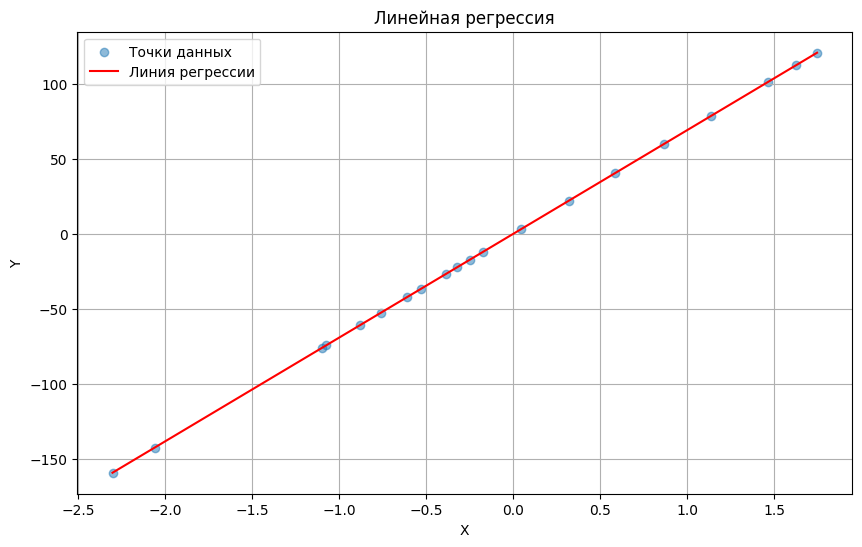

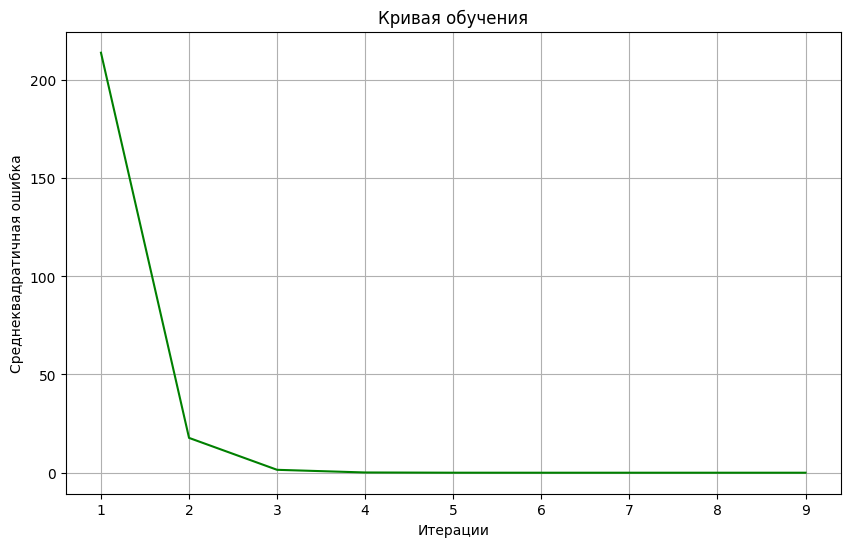


Начальные параметры b0=1, b1=1
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


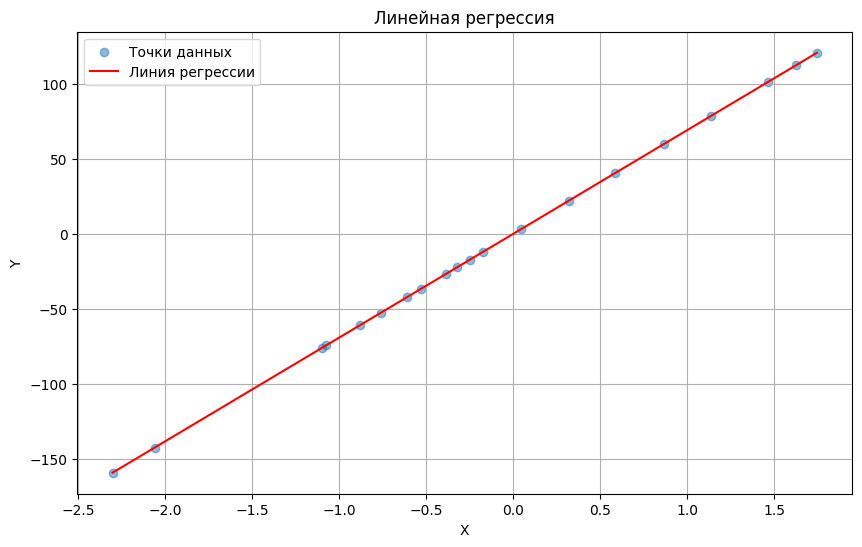

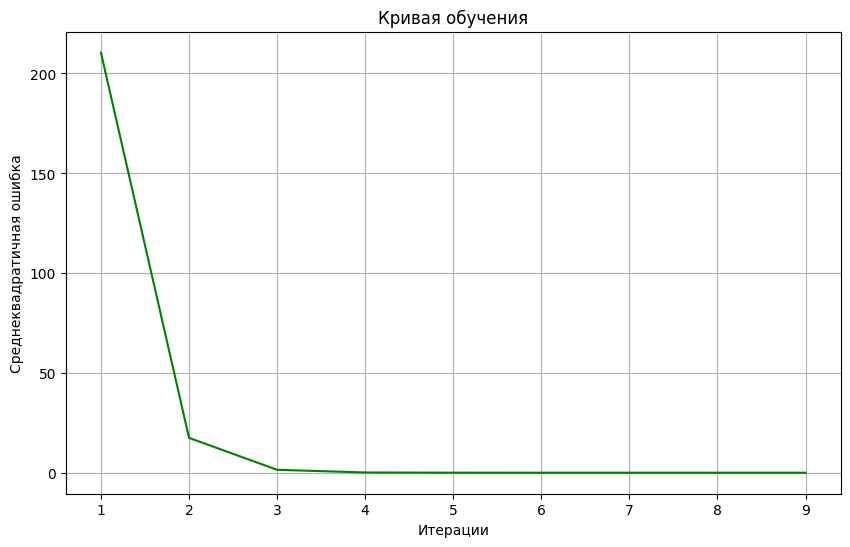


Начальные параметры b0=-1, b1=-1
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


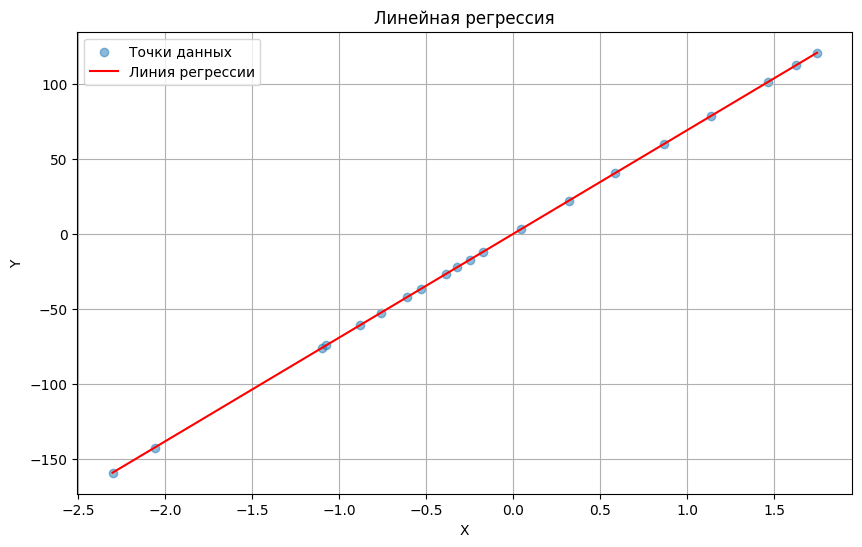

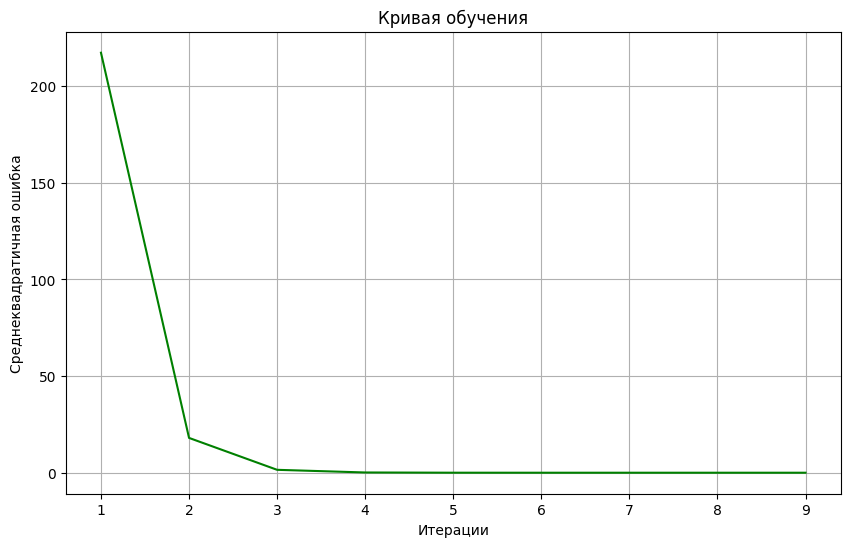


Начальные параметры b0=10, b1=10
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


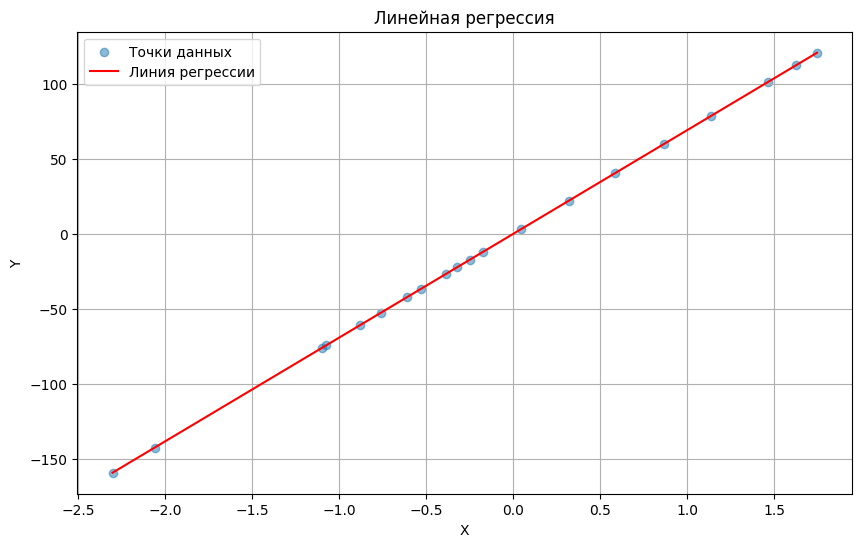

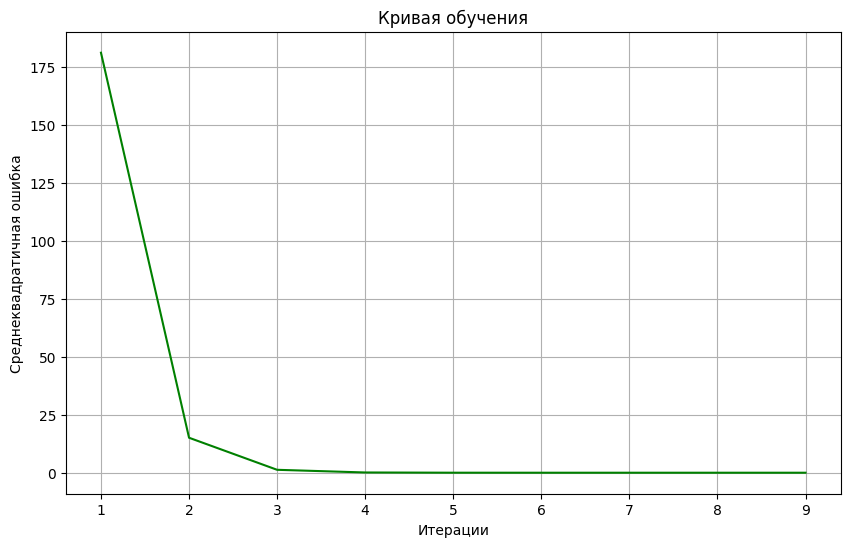


Начальные параметры b0=-10, b1=-10
Итоговая ошибка: 0.000000
Итоговые параметры b0=0.0001, b1=69.1875


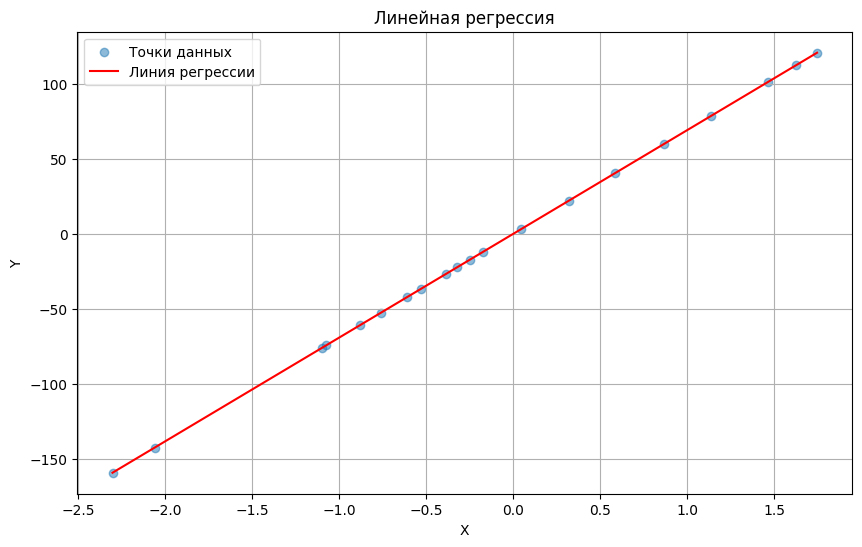

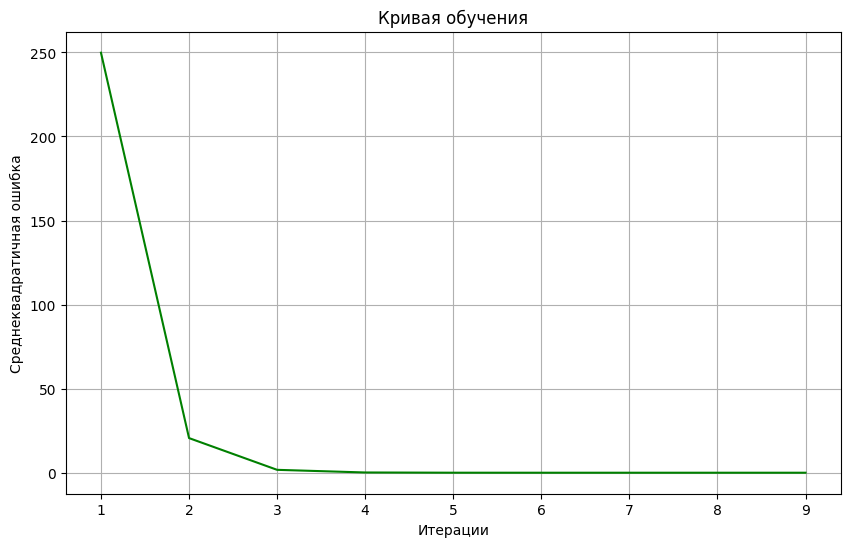


=== Визуализация результатов для разных скоростей обучения ===

Скорость обучения alpha=0.1
Итоговая ошибка: 0.000004
Количество шагов: 92


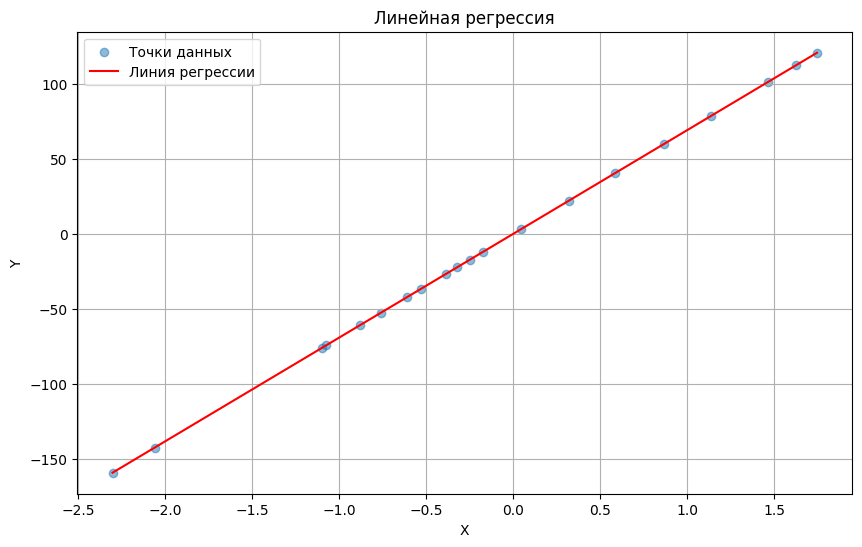

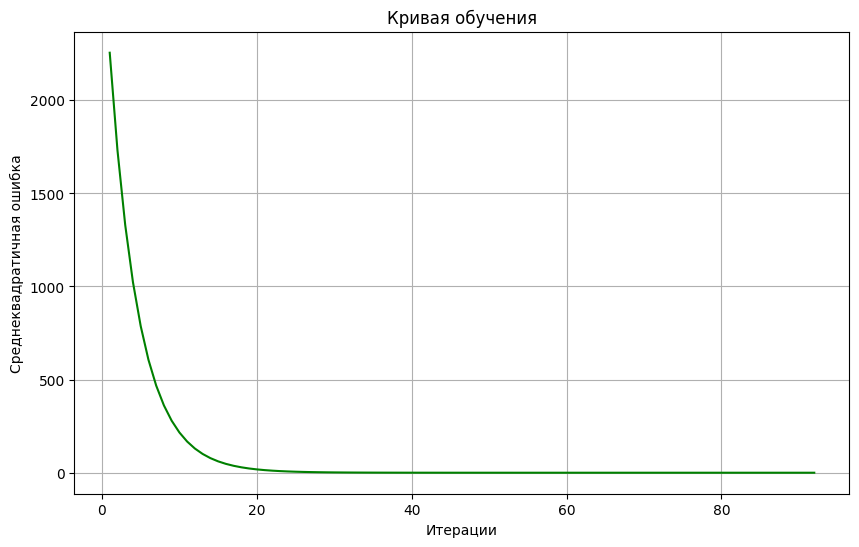


Скорость обучения alpha=0.5
Итоговая ошибка: 0.000000
Количество шагов: 16


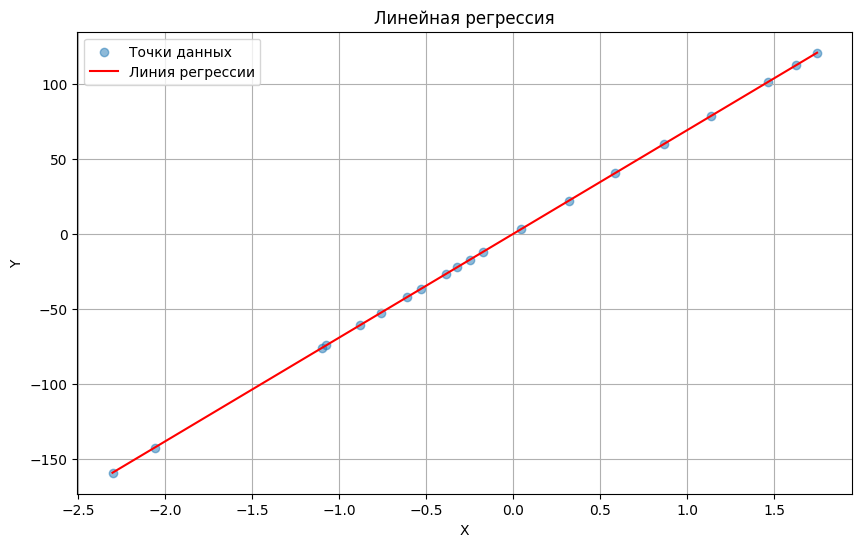

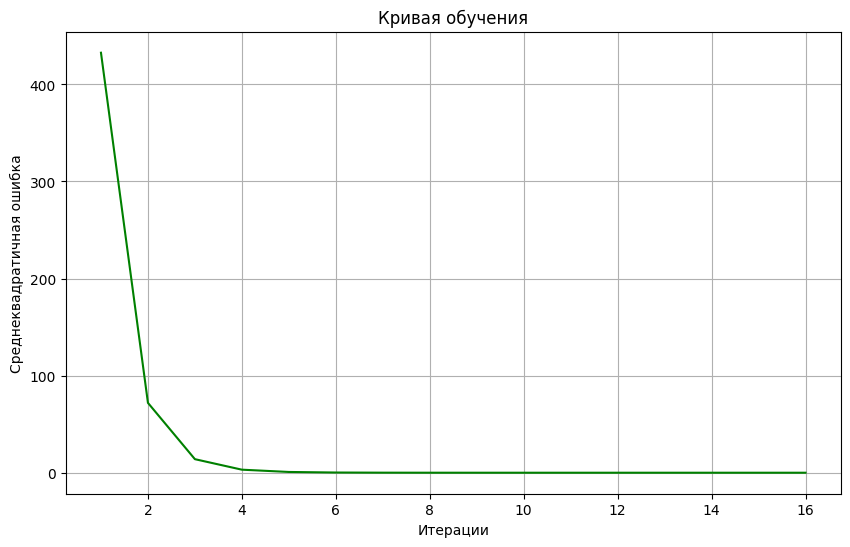


Скорость обучения alpha=1.0
Итоговая ошибка: 0.000000
Количество шагов: 9


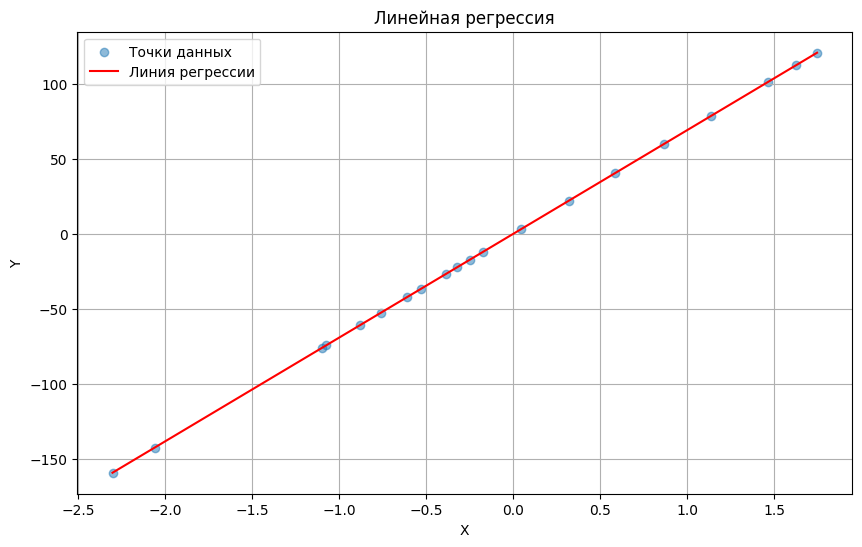

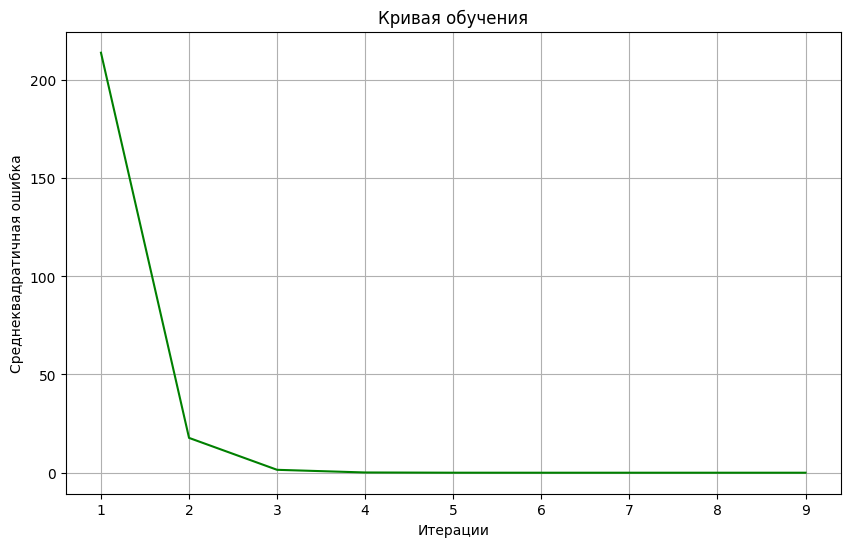


Скорость обучения alpha=2.0
Итоговая ошибка: 0.000000
Количество шагов: 11


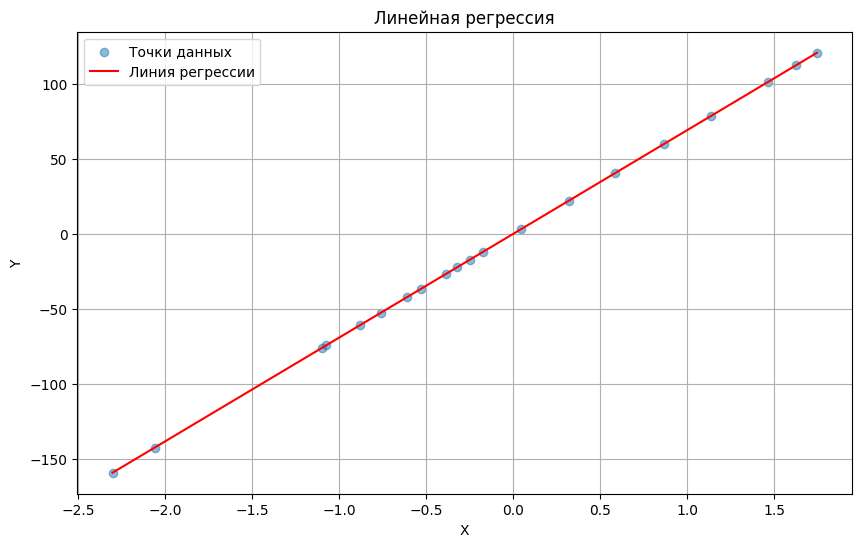

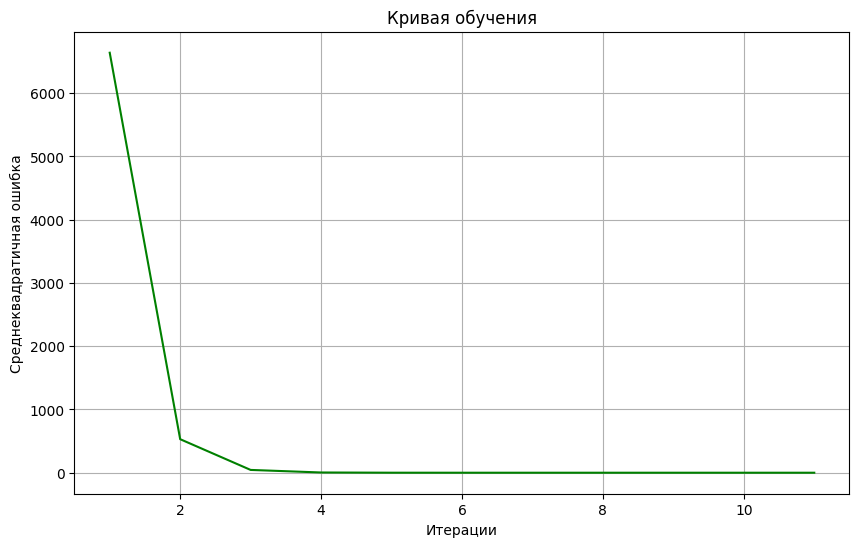


Скорость обучения alpha=5.0
Итоговая ошибка: 0.000001
Количество шагов: 26


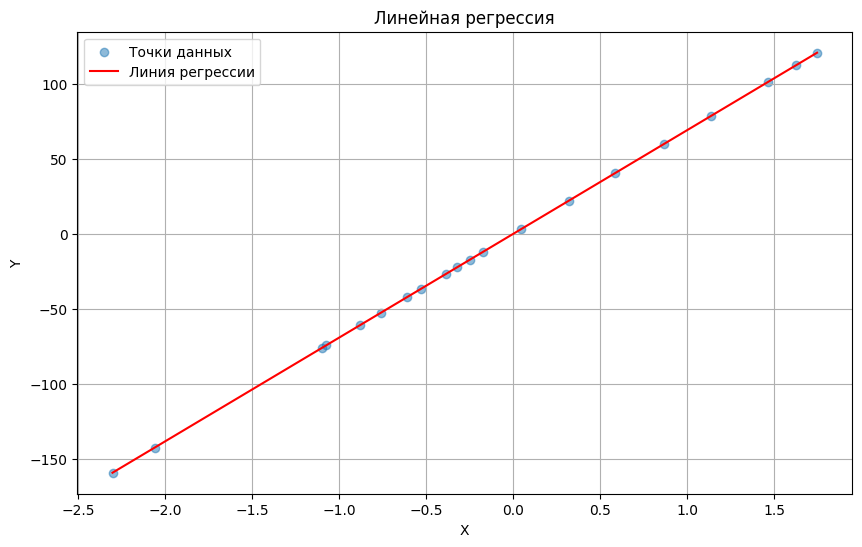

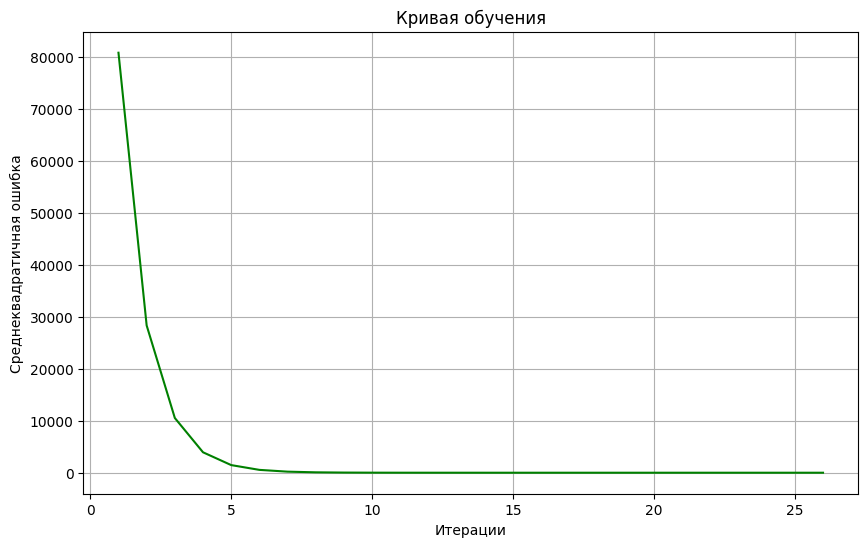


Скорость обучения alpha=10.0
Итоговая ошибка: 0.000000
Количество шагов: 28


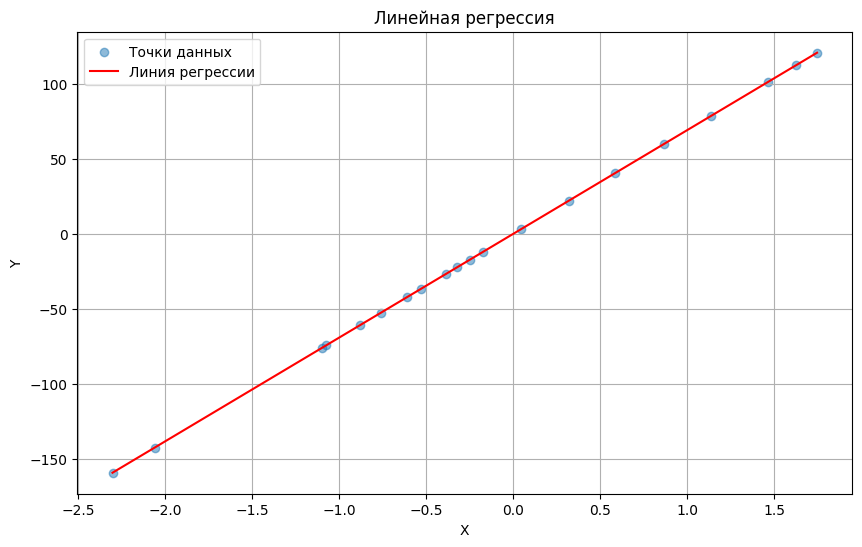

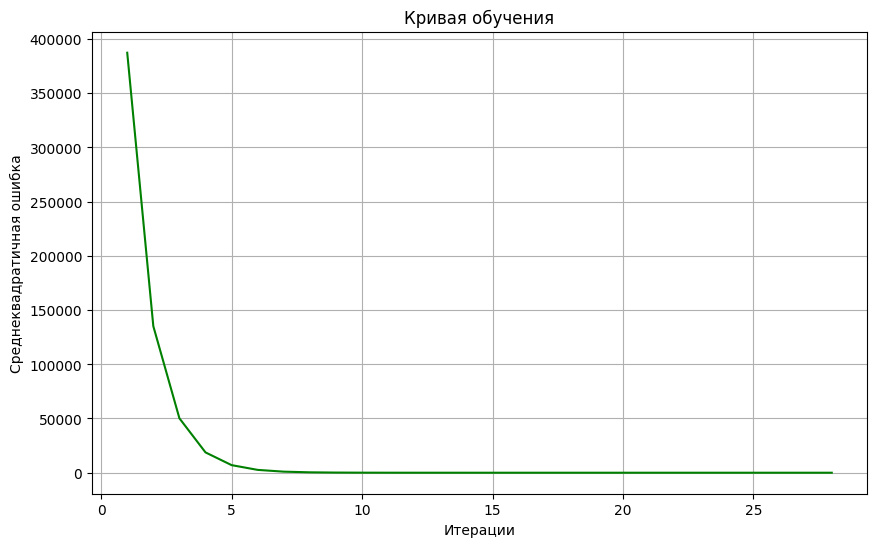

In [4]:
# Визуализация результатов
# Построение итоговых графиков регрессии и кривых обучения для всех экспериментов

# Визуализация результатов для разных начальных значений параметров
print("=== Визуализация результатов для разных начальных значений параметров ===")
for b0, b1 in initial_params:
    model = Model(b0=b0, b1=b1)
    steps, errors = model.fit(x, y)
    print(f"\nНачальные параметры b0={b0}, b1={b1}")
    print(f"Итоговая ошибка: {model.error(x, y):.6f}")
    print(f"Итоговые параметры b0={model.b0:.4f}, b1={model.b1:.4f}")
    model.plot_regression(x, y)
    model.plot_learning_curve(steps, errors)

# Визуализация результатов для разных скоростей обучения
print("\n=== Визуализация результатов для разных скоростей обучения ===")
for alpha in learning_rates:
    model = Model()
    steps, errors = model.fit(x, y, alpha=alpha)
    print(f"\nСкорость обучения alpha={alpha}")
    print(f"Итоговая ошибка: {model.error(x, y):.6f}")
    print(f"Количество шагов: {len(steps)}")
    model.plot_regression(x, y)
    model.plot_learning_curve(steps, errors)